In [78]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import csv

In [79]:
### Define Variables and Data Needed

In [101]:
# Define Variables
W_th = 2905 * 10**6 / (1.6*10**(-13))  # MW to MeV
E_235 = 202.36    #MeV
E_238 = 205.99    #MeV
E_239 = 211.12    #MeV
E_241 = 214.26    #MeV

In [92]:
energy = np.linspace(2.00, 8.00, 25)   #MeV

In [93]:
# Fissile Isotope Antineutrino Spectra Data 
# From Mueller et al 2011
N_235 = [1.31, 1.11, 0.927, 0.775, 0.651, 0.547, 0.449, 0.368, \
         0.288, 0.227, 0.177, 0.137, 0.109, 0.0854, 0.0656, \
         0.0499, 0.0368, 0.0274, 0.0207, 0.0156, 0.0111, 0.00691, \
         0.00430, 0.00278, 0.00149]

N_238 = [1.48, 1.30, 1.15, 1.00, 0.876, 0.759, 0.642, 0.539, 0.451, \
        0.367, 0.293, 0.232, 0.183, 0.143, 0.110, 8.35*10**(-2), \
        6.21*10**(-2), 4.70*10**(-2), 3.58*10**(-2), 2.71*10**(-2), \
        1.95*10**(-2), 1.33*10**(-2), 8.65*10**(-3), 6.01*10**(-3), \
        3.84*10**(-3)]

N_239 = [1.13, 0.919, 0.728, 0.613, 0.504, 0.410, 0.321, 0.254, 0.200,\
        0.151, 0.110, 7.97*10**(-2), 6.15*10**(-2), 4.68*10**(-2), \
        3.50*10**(-2), 2.55*10**(-2), 1.82*10**(-2), 1.32*10**(-2), \
        9.82*10**(-3), 7.32*10**(-3), 5.13*10**(-3), 3.15*10**(-3), \
        1.83*10**(-3), 1.03*10**(-3), 4.91*10**(-4)]

N_241 = [1.27, 1.07, 0.906, 0.763, 0.639, 0.531, 0.433, 0.351, 0.282, \
        0.218, 0.165, 0.122, 9.59*10**(-2), 7.36*10**(-2), \
        5.52*10**(-2), 4.01*10**(-2), 2.81*10**(-2), 2.04*10**(-2), \
        1.50*10**(-2), 1.07*10**(-2), 7.20*10**(-3), 4.47*10**(-3), \
        2.54*10**(-3), 1.65*10**(-3), 9.63*10**(-4)]

In [94]:
# Early Operation Period Fission Fractions
# From An et al 2017
e_235 = 0.7064
e_238 = 0.0745
e_239 = 0.1830
e_241 = 0.0297
e_factor = W_th/(e_235*E_235+e_238*E_238+e_239*E_239+e_241*E_241)

# Late Operation Period Fission Fractions
# From An et al 2017
l_235 = 0.4681
l_238 = 0.0766
l_239 = 0.3681
l_241 = 0.0809
l_factor = W_th/(l_235*E_235+l_238*E_238+l_239*E_239+l_241*E_241)

In [95]:
### Calculate Antineutrinos Generated per Second for All Energies

In [96]:
total_early = []
total_late = []

for i in range(len(energy)) :
    e_sum = e_235*N_235[i]+e_238*N_238[i]+e_239*N_239[i]+e_241*N_241[i]
    total_early.append(e_factor*e_sum)
    l_sum = l_235*N_235[i]+l_238*N_238[i]+l_239*N_239[i]+l_241*N_241[i]
    total_late.append(l_factor*l_sum)

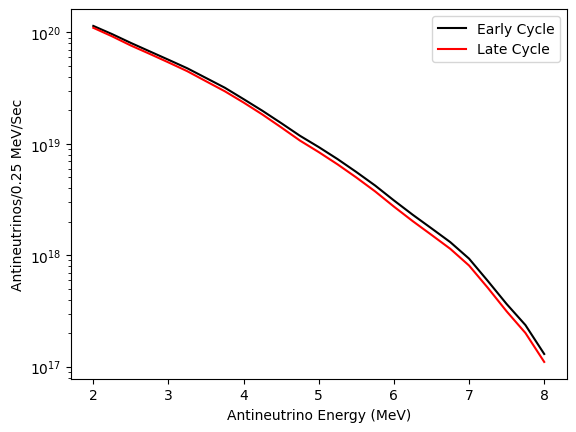

In [86]:
# Plot
plt.plot(energy, total_early, color='black', label='Early Cycle')
plt.plot(energy, total_late, color='red', label='Late Cycle')
plt.xlabel('Antineutrino Energy (MeV)')
plt.ylabel('Antineutrinos/0.25 MeV/Sec')
plt.yscale('log')
plt.legend()
plt.savefig('Reactor_Spectrum.png')

In [97]:
# Calculate Total Neutrinos per Second
print('Early Core Antineutrino Flux = ' + str(sum(total_early)) + ' per second')
print('Late Core Antineutrino Flux = ' + str(sum(total_late)) + ' per second')

Early Core Antineutrino Flux = 2.2156213551937386e+17 per second
Late Core Antineutrino Flux = 2.0896899925267005e+17 per second


In [98]:
### Download Data

In [99]:
csv_file = 'rx_spectrum_early.csv'
with open(csv_file, 'w', newline='') as file:
    fieldnames = ['energy', 'dN/dE']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(energy)) :
        writer.writerow({'energy': energy[i], 'dN/dE': total_early[i]})

In [100]:
csv_file = 'rx_spectrum_late.csv'
with open(csv_file, 'w', newline='') as file:
    fieldnames = ['energy', 'dN/dE']
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(energy)) :
        writer.writerow({'energy': energy[i], 'dN/dE': total_late[i]})